In [1]:
import pandas as pd
import numpy as np
import joblib

from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

In [2]:
cols_to_drop = ['Unnamed: 0', 'averageRating', 'numVotes', '_orig_order']

bin_labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000',
              '5000-10000', '10000-20000', '20000-40000', '40000+']  # keep yours as-is

In [5]:
model = joblib.load("xgb_classifier.joblib")

# 2) Load holdout set (change path)
holdout = pd.read_csv(r".\data\test_dataset.csv", sep=";")

# Optional: if you also sorted training data temporally, do it here too (not required for prediction)
holdout = holdout.sort_values(by=['startYear', '_orig_order'])

# 3) Prepare X_test / y_test exactly like training
holdout = holdout.drop(columns=cols_to_drop, errors="ignore")

In [6]:
enc_bundle = joblib.load("movie_score_target_encoder.joblib")

label_encoder = enc_bundle["label_encoder"]
bin_labels     = enc_bundle["bin_labels"]
target_column  = enc_bundle["target_column"]

In [7]:
y_test = holdout["movie_score_bin_encoded"].values
X_test = holdout.drop(columns=["movie_score_bin_encoded"])

In [8]:
train_cols = model.get_booster().feature_names
X_test = X_test.reindex(columns=train_cols, fill_value=0)

In [9]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

c:\Users\ander\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\core.py:774: UserWarning: [13:54:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


Accuracy: 0.4254095826893354
F1 macro: 0.22837766785650898

Classification report:
              precision    recall  f1-score   support

        0-10       0.51      0.01      0.02      6832
       10-50       0.48      0.76      0.59     20792
      50-100       0.38      0.55      0.45     14739
     100-500       0.35      0.42      0.38      6395
    500-1000       0.21      0.05      0.08       852
   1000-5000       0.17      0.08      0.11       544
  5000-10000       0.51      0.63      0.57       838
 10000-20000       0.26      0.00      0.00      8110
 20000-40000       0.25      0.01      0.02      4343
      40000+       0.20      0.03      0.06      1255

    accuracy                           0.43     64700
   macro avg       0.33      0.26      0.23     64700
weighted avg       0.39      0.43      0.34     64700



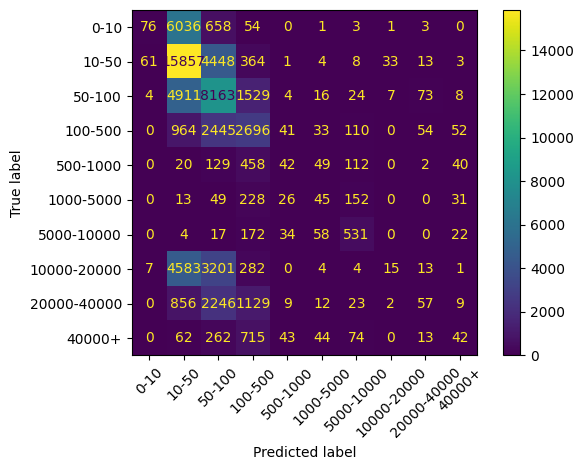

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 macro:", f1_score(y_test, y_pred, average="macro"))

print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=bin_labels))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bin_labels)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.show()